In [512]:
import os
import matplotlib.pyplot as plt
import pandas as pd

import astropy.units as u
from astropy.io import fits
from astropy.table import Table, join, vstack
from astropy.coordinates import SkyCoord

from matplotlib.colors import LogNorm
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.figure import Figure
from scipy.optimize import curve_fit
from scipy.optimize import minimize
import glob
import astropy.units as u
import astropy.constants as const
from astropy.coordinates import SkyCoord, CartesianRepresentation, Galactic,  cartesian_to_spherical

In [513]:
#USANDO csv
catalogo = os.path.join('/home/sofia/Documentos/Pantheon/', 'Pantheon-SH0ES.csv')

In [514]:
catalogo_tabela = Table.read(catalogo)

In [515]:
zdata = catalogo_tabela['zCMB']
zedata = catalogo_tabela['zCMBERR']

mudata = catalogo_tabela['MU_SH0ES']
muedata = catalogo_tabela['MU_SH0ES_ERR_DIAG']

radata = catalogo_tabela['RA']
decdata = catalogo_tabela['DEC']

vpec = catalogo_tabela['VPEC']

In [516]:
#Distância
exp = (mudata-25)/5
dist = np.power(10, exp)

#velocidade de recessão Lei de Hubble
c = const.c.decompose().to('km/s').value
v = c*zdata

In [517]:
def f(z, H0):
    c = const.c.decompose().to('km/s').value
    return (c*z)/H0

SEM ERROS DE DL:

(I) Intervalos escolhidos:

0.01 <= z <= 0.05

0.0095 <= z <= 0.04

0.009 <= z <= 0.03

In [518]:
curve, cove = curve_fit(f, zdata, dist, method='trf')
cov = np.array(np.sqrt(np.diag(cove)))

In [519]:
#Vou definir H0 e o erro de H0 arredondando para duas casas decimais
H0 = np.around(curve[0], 2)
H0_err = float(np.around(cov[0], 2))

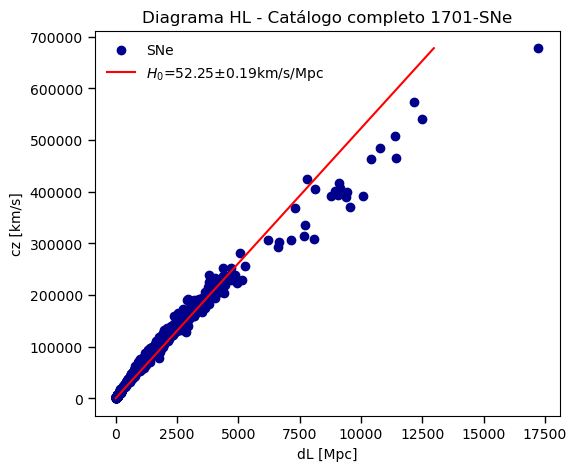

In [520]:
fig = plt.figure(figsize=(6, 5))
plt.scatter(dist, v, label='SNe', color='darkblue')
plt.plot(f(zdata, curve[0]), v, color='red', label='$H_{0}$='+str(H0)+'$\pm$'+str(H0_err)+'km/s/Mpc')
plt.xlabel("dL [Mpc]", fontsize=10)
plt.ylabel("cz [km/s]", fontsize=10)
plt.tick_params(axis='both', labelsize=10, length=5, which='both', width=1 )
plt.legend(fontsize=10, frameon=False)
plt.title('Diagrama HL - Catálogo completo 1701-SNe')
plt.show()

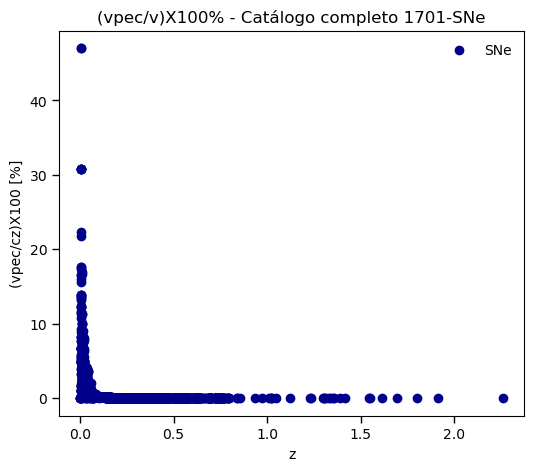

In [521]:
fig = plt.figure(figsize=(6, 5))
plt.scatter(zdata, abs((vpec/v)*100), label='SNe', color='darkblue')
plt.xlabel("z", fontsize=10)
plt.ylabel("(vpec/cz)X100 [%]", fontsize=10)
plt.tick_params(axis='both', labelsize=10, length=5, which='both', width=1 )
plt.legend(fontsize=10, frameon=False)
plt.title('(vpec/v)X100% - Catálogo completo 1701-SNe')
plt.show()

In [522]:
coord = SkyCoord(ra=radata, dec=decdata, frame='icrs', unit='deg')
coordenadas = coord.galactic

l = (coordenadas.l.deg)*np.pi/180
b = (coordenadas.b.deg)*np.pi/180

In [523]:
l[l > np.pi] = l[l > np.pi] - 2*np.pi
l[l < np.pi] = l[l < np.pi]*(-1)

In [524]:
catalogo_tabela['l'] = l
catalogo_tabela['b'] = b

In [525]:
dataN = catalogo_tabela[(catalogo_tabela['b']>=0)]

In [526]:
len(dataN)

664

In [527]:
dataS = catalogo_tabela[(catalogo_tabela['b']<=0)]

In [528]:
len(dataS)

1037

In [529]:
dataN1 = dataN[(dataN['zCMB']>=0.01)&(dataN['zCMB']<=0.05)]
dataN2 = dataN[(dataN['zCMB']>=0.0095)&(dataN['zCMB']<=0.04)]
dataN3 = dataN[(dataN['zCMB']>=0.009)&(dataN['zCMB']<=0.03)]

In [530]:
zdataN1 = dataN1['zCMB']
zedataN1 = dataN1['zCMBERR']

mudataN1 = dataN1['MU_SH0ES']
muedataN1 = dataN1['MU_SH0ES_ERR_DIAG']

radataN1 = dataN1['RA']
decdataN1 = dataN1['DEC']

vpecN1 = dataN1['VPEC']

In [531]:
#Distância
expN1 = (mudataN1-25)/5
distN1 = np.power(10, expN1)

#velocidade de recessão Lei de Hubble
c = const.c.decompose().to('km/s').value
vN1 = c*zdataN1

In [532]:
curveN1, coveN1 = curve_fit(f, zdataN1, distN1, method='trf')
covN1 = np.array(np.sqrt(np.diag(coveN1)))

In [533]:
#Vou definir H0 e o erro de H0 arredondando para duas casas decimais
H0N1 = np.around(curveN1[0], 2)
H0N1_err = float(np.around(covN1[0], 2))

In [534]:
len(dataN1)

290

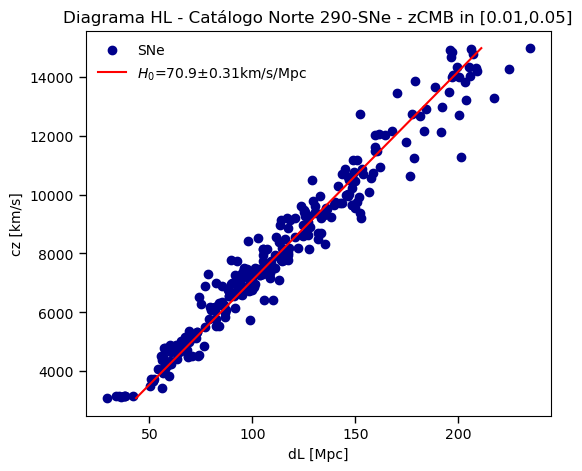

In [535]:
fig = plt.figure(figsize=(6, 5))
plt.scatter(distN1, vN1, label='SNe', color='darkblue')
plt.plot(f(zdataN1, curveN1[0]), vN1, color='red', label='$H_{0}$='+str(H0N1)+'$\pm$'+str(H0N1_err)+'km/s/Mpc')
plt.xlabel("dL [Mpc]", fontsize=10)
plt.ylabel("cz [km/s]", fontsize=10)
plt.tick_params(axis='both', labelsize=10, length=5, which='both', width=1 )
plt.legend(fontsize=10, frameon=False)
plt.title('Diagrama HL - Catálogo Norte 290-SNe - zCMB in [0.01,0.05]')
plt.show()

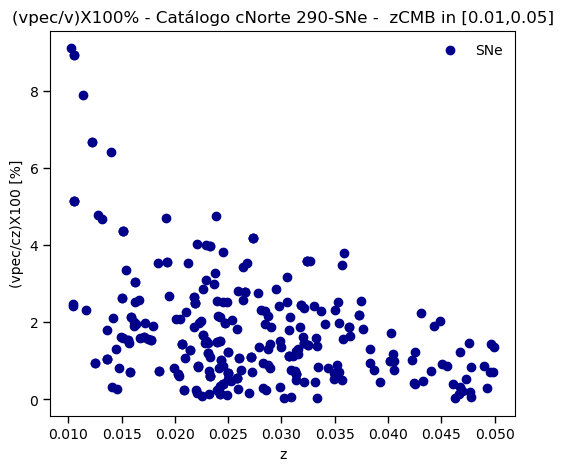

In [536]:
fig = plt.figure(figsize=(6, 5))
plt.scatter(zdataN1, abs((vpecN1/vN1)*100), label='SNe', color='darkblue')
plt.xlabel("z", fontsize=10)
plt.ylabel("(vpec/cz)X100 [%]", fontsize=10)
plt.tick_params(axis='both', labelsize=10, length=5, which='both', width=1 )
plt.legend(fontsize=10, frameon=False)
plt.title('(vpec/v)X100% - Catálogo cNorte 290-SNe -  zCMB in [0.01,0.05]')
plt.show()

In [537]:
zdataN2 = dataN2['zCMB']
zedataN2 = dataN2['zCMBERR']

mudataN2 = dataN2['MU_SH0ES']
muedataN2 = dataN2['MU_SH0ES_ERR_DIAG']

radataN2 = dataN2['RA']
decdataN2 = dataN2['DEC']

vpecN2 = dataN2['VPEC']

In [538]:
#Distância
expN2 = (mudataN2-25)/5
distN2 = np.power(10, expN2)

#velocidade de recessão Lei de Hubble
c = const.c.decompose().to('km/s').value
vN2 = c*zdataN2

In [539]:
curveN2, coveN2 = curve_fit(f, zdataN2, distN2, method='trf')
covN2 = np.array(np.sqrt(np.diag(coveN2)))

In [540]:
#Vou definir H0 e o erro de H0 arredondando para duas casas decimais
H0N2 = np.around(curveN2[0], 2)
H0N2_err = float(np.around(covN2[0], 2))

In [541]:
len(dataN2)

267

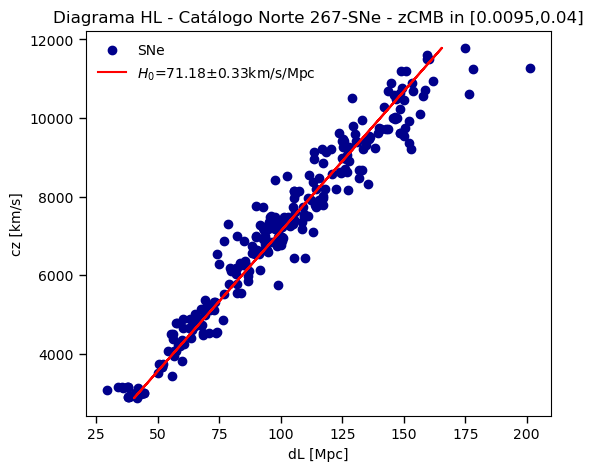

In [542]:
fig = plt.figure(figsize=(6, 5))
plt.scatter(distN2, vN2, label='SNe', color='darkblue')
plt.plot(f(zdataN2, curveN2[0]), vN2, color='red', label='$H_{0}$='+str(H0N2)+'$\pm$'+str(H0N2_err)+'km/s/Mpc')
plt.xlabel("dL [Mpc]", fontsize=10)
plt.ylabel("cz [km/s]", fontsize=10)
plt.tick_params(axis='both', labelsize=10, length=5, which='both', width=1 )
plt.legend(fontsize=10, frameon=False)
plt.title('Diagrama HL - Catálogo Norte 267-SNe - zCMB in [0.0095,0.04]')
plt.show()

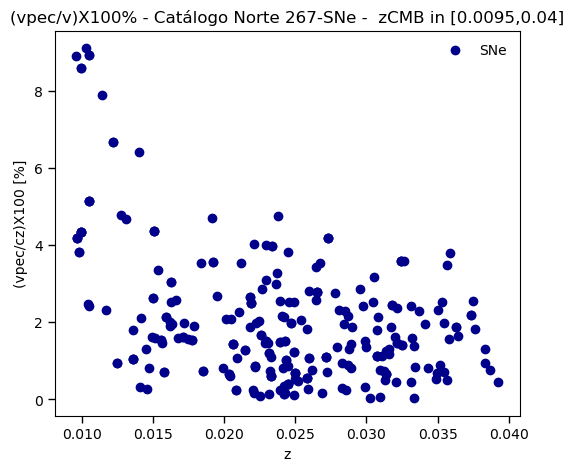

In [543]:
fig = plt.figure(figsize=(6, 5))
plt.scatter(zdataN2, abs((vpecN2/vN2)*100), label='SNe', color='darkblue')
plt.xlabel("z", fontsize=10)
plt.ylabel("(vpec/cz)X100 [%]", fontsize=10)
plt.tick_params(axis='both', labelsize=10, length=5, which='both', width=1 )
plt.legend(fontsize=10, frameon=False)
plt.title('(vpec/v)X100% - Catálogo Norte 267-SNe -  zCMB in [0.0095,0.04]')
plt.show()

In [544]:
zdataN3 = dataN3['zCMB']
zedataN3 = dataN3['zCMBERR']

mudataN3 = dataN3['MU_SH0ES']
muedataN3 = dataN3['MU_SH0ES_ERR_DIAG']

radataN3 = dataN3['RA']
decdataN3 = dataN3['DEC']

vpecN3 = dataN3['VPEC']

In [545]:
#Distância
expN3 = (mudataN3-25)/5
distN3 = np.power(10, expN3)

#velocidade de recessão Lei de Hubble
c = const.c.decompose().to('km/s').value
vN3 = c*zdataN3

In [546]:
curveN3, coveN3 = curve_fit(f, zdataN3, distN3, method='trf')
covN3 = np.array(np.sqrt(np.diag(coveN3)))

In [547]:
#Vou definir H0 e o erro de H0 arredondando para duas casas decimais
H0N3 = np.around(curveN3[0], 2)
H0N3_err = float(np.around(covN3[0], 2))

In [548]:
len(dataN3)

207

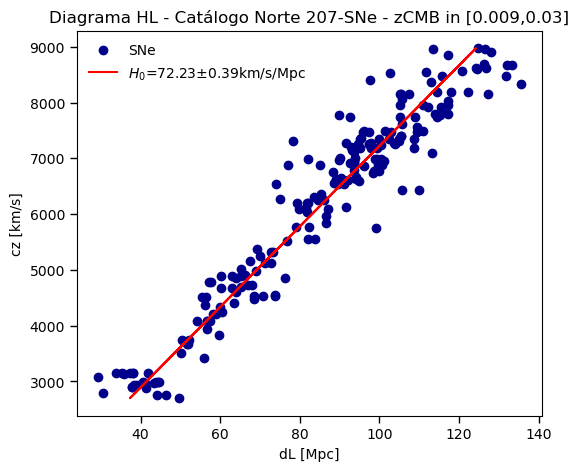

In [549]:
fig = plt.figure(figsize=(6, 5))
plt.scatter(distN3, vN3, label='SNe', color='darkblue')
plt.plot(f(zdataN3, curveN3[0]), vN3, color='red', label='$H_{0}$='+str(H0N3)+'$\pm$'+str(H0N3_err)+'km/s/Mpc')
plt.xlabel("dL [Mpc]", fontsize=10)
plt.ylabel("cz [km/s]", fontsize=10)
plt.tick_params(axis='both', labelsize=10, length=5, which='both', width=1 )
plt.legend(fontsize=10, frameon=False)
plt.title('Diagrama HL - Catálogo Norte 207-SNe - zCMB in [0.009,0.03]')
plt.show()

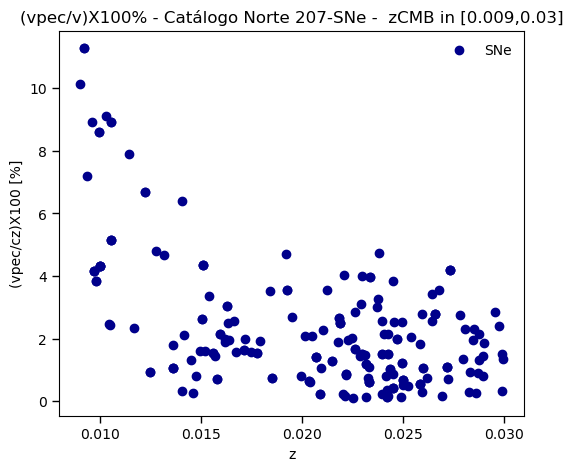

In [550]:
fig = plt.figure(figsize=(6, 5))
plt.scatter(zdataN3, abs((vpecN3/vN3)*100), label='SNe', color='darkblue')
plt.xlabel("z", fontsize=10)
plt.ylabel("(vpec/cz)X100 [%]", fontsize=10)
plt.tick_params(axis='both', labelsize=10, length=5, which='both', width=1 )
plt.legend(fontsize=10, frameon=False)
plt.title('(vpec/v)X100% - Catálogo Norte 207-SNe -  zCMB in [0.009,0.03]')
plt.show()

COM ERROS DE DL:

(II) Propagando o erro da distância:

dist_err = muedata . (ln(10) / 5) . 10^[(mudata-25)/5]

In [551]:
#calcular a propagação de erro (catálogo completo)
dist_err = muedata*(np.log(10) / 5)*np.power(10,exp)

#calcular a propagação de erro (intervalo 0.01 <= z <= 0.05)
distN1_err = muedataN1*(np.log(10) / 5)*np.power(10,expN1)

#calcular a propagação de erro (intervalo 0.0095 <= z <= 0.04)
distN2_err = muedataN2*(np.log(10) / 5)*np.power(10,expN2)

#calcular a propagação de erro (intervalo 0.009 <= z <= 0.03)
distN3_err = muedataN3*(np.log(10) / 5)*np.power(10,expN3)

(III) Encontrando os novos diagramas HL:

In [552]:
curve, cove = curve_fit(f, zdata, dist, method='trf', sigma=dist_err)
cov = np.array(np.sqrt(np.diag(cove)))

In [553]:
#Vou definir H0 e o erro de H0 arredondando para duas casas decimais
H0 = np.around(curve[0], 2)
H0_err = float(np.around(cov[0], 2))

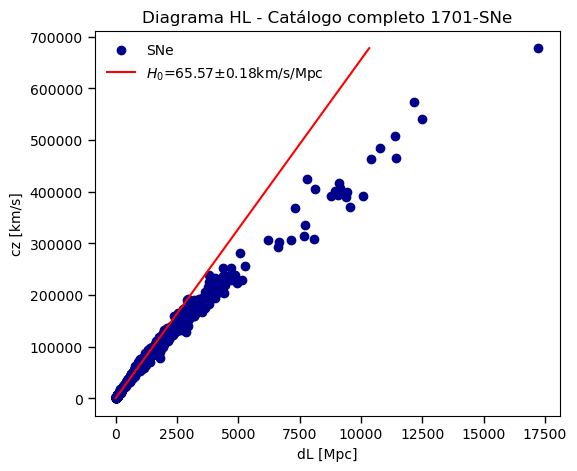

In [554]:
fig = plt.figure(figsize=(6, 5))
plt.scatter(dist, v, label='SNe', color='darkblue')
plt.plot(f(zdata, curve[0]), v, color='red', label='$H_{0}$='+str(H0)+'$\pm$'+str(H0_err)+'km/s/Mpc')
plt.xlabel("dL [Mpc]", fontsize=10)
plt.ylabel("cz [km/s]", fontsize=10)
plt.tick_params(axis='both', labelsize=10, length=5, which='both', width=1 )
plt.legend(fontsize=10, frameon=False)
plt.title('Diagrama HL - Catálogo completo 1701-SNe')
plt.show()

In [555]:
curveN1, coveN1 = curve_fit(f, zdataN1, distN1, method='trf', sigma=distN1_err)
covN1 = np.array(np.sqrt(np.diag(coveN1)))

In [556]:
#Vou definir H0 e o erro de H0 arredondando para duas casas decimais
H0N1 = np.around(curveN1[0], 2)
H0N1_err = float(np.around(covN1[0], 2))

In [557]:
len(dataN1)

290

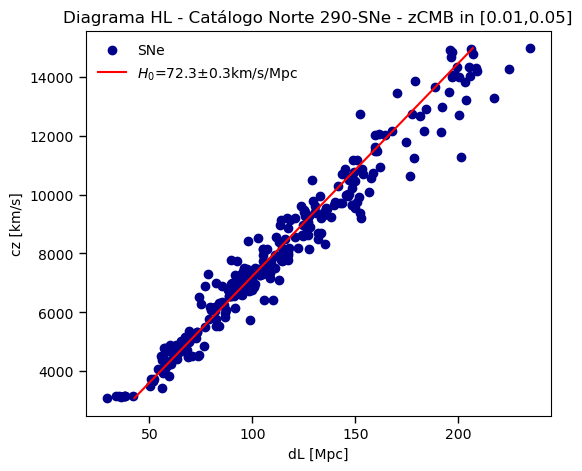

In [558]:
fig = plt.figure(figsize=(6, 5))
plt.scatter(distN1, vN1, label='SNe', color='darkblue')
plt.plot(f(zdataN1, curveN1[0]), vN1, color='red', label='$H_{0}$='+str(H0N1)+'$\pm$'+str(H0N1_err)+'km/s/Mpc')
plt.xlabel("dL [Mpc]", fontsize=10)
plt.ylabel("cz [km/s]", fontsize=10)
plt.tick_params(axis='both', labelsize=10, length=5, which='both', width=1 )
plt.legend(fontsize=10, frameon=False)
plt.title('Diagrama HL - Catálogo Norte 290-SNe - zCMB in [0.01,0.05]')
plt.show()

In [559]:
curveN2, coveN2 = curve_fit(f, zdataN2, distN2, method='trf', sigma=distN2_err)
covN2 = np.array(np.sqrt(np.diag(coveN2)))

In [560]:
#Vou definir H0 e o erro de H0 arredondando para duas casas decimais
H0N2 = np.around(curveN2[0], 2)
H0N2_err = float(np.around(covN2[0], 2))

In [561]:
len(dataN2)

267

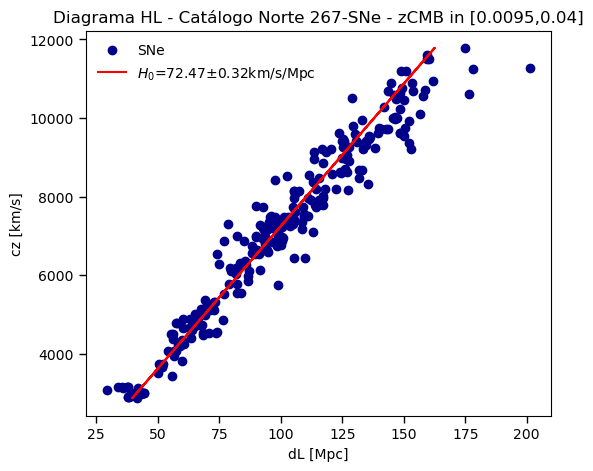

In [562]:
fig = plt.figure(figsize=(6, 5))
plt.scatter(distN2, vN2, label='SNe', color='darkblue')
plt.plot(f(zdataN2, curveN2[0]), vN2, color='red', label='$H_{0}$='+str(H0N2)+'$\pm$'+str(H0N2_err)+'km/s/Mpc')
plt.xlabel("dL [Mpc]", fontsize=10)
plt.ylabel("cz [km/s]", fontsize=10)
plt.tick_params(axis='both', labelsize=10, length=5, which='both', width=1 )
plt.legend(fontsize=10, frameon=False)
plt.title('Diagrama HL - Catálogo Norte 267-SNe - zCMB in [0.0095,0.04]')
plt.show()

In [563]:
curveN3, coveN3 = curve_fit(f, zdataN3, distN3, method='trf', sigma=distN3_err)
covN3 = np.array(np.sqrt(np.diag(coveN3)))

In [564]:
#Vou definir H0 e o erro de H0 arredondando para duas casas decimais
H0N3 = np.around(curveN3[0], 2)
H0N3_err = float(np.around(covN3[0], 2))

In [565]:
len(dataN3)

207

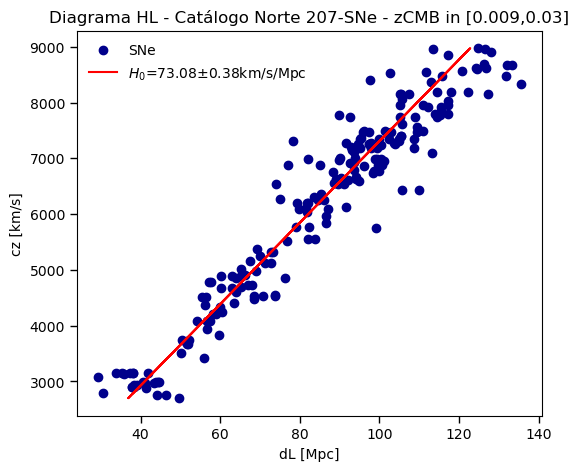

In [566]:
fig = plt.figure(figsize=(6, 5))
plt.scatter(distN3, vN3, label='SNe', color='darkblue')
plt.plot(f(zdataN3, curveN3[0]), vN3, color='red', label='$H_{0}$='+str(H0N3)+'$\pm$'+str(H0N3_err)+'km/s/Mpc')
plt.xlabel("dL [Mpc]", fontsize=10)
plt.ylabel("cz [km/s]", fontsize=10)
plt.tick_params(axis='both', labelsize=10, length=5, which='both', width=1 )
plt.legend(fontsize=10, frameon=False)
plt.title('Diagrama HL - Catálogo Norte 207-SNe - zCMB in [0.009,0.03]')
plt.show()

(IV) Escolhe apenas um intervalo e acrescenta nesse gráfico as barras de erro de DL e também de cz, só para visualização. Lembre-se também de propagar o erro da velocidade de recessão, nesse caso, utilizando os erros do redshift que também estão no catálogo.

Intervalo escolhido: 0.01 <= z <= 0.05

In [567]:
#calculando a incerteza de v = cz:

vN1 = c*zdataN1
vN1_err = c*zedataN1

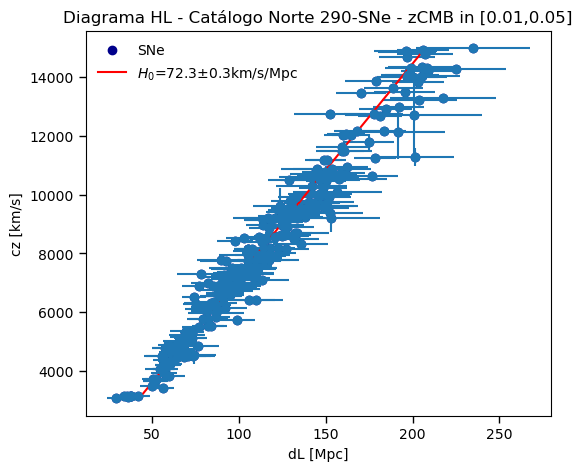

In [568]:
fig = plt.figure(figsize=(6, 5))

# Adicionando as barras de erro no gráfico de dispersão
plt.errorbar(distN1, vN1, xerr=distN1_err, yerr=vN1_err, fmt='o')

plt.scatter(distN1, vN1, label='SNe', color='darkblue')
plt.plot(f(zdataN1, curveN1[0]), vN1, color='red', label='$H_{0}$='+str(H0N1)+'$\pm$'+str(H0N1_err)+'km/s/Mpc')
plt.xlabel("dL [Mpc]", fontsize=10)
plt.ylabel("cz [km/s]", fontsize=10)
plt.tick_params(axis='both', labelsize=10, length=5, which='both', width=1 )
plt.legend(fontsize=10, frameon=False)
plt.title('Diagrama HL - Catálogo Norte 290-SNe - zCMB in [0.01,0.05]')
plt.show()